In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib
!pip install tensorflow
!pip install numpy
!pip install scikit-learn
!pip install scipy
!pip install nltk

In [ ]:
!pip install keras

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import word_tokenize, pos_tag
from sklearn.model_selection import train_test_split
import nltk
import re
import string

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/emotion_dataset_raw.csv")

In [ ]:
print("Shape of Data", df.shape)
print(df.head())

Shape of Data (34792, 2)
   Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...


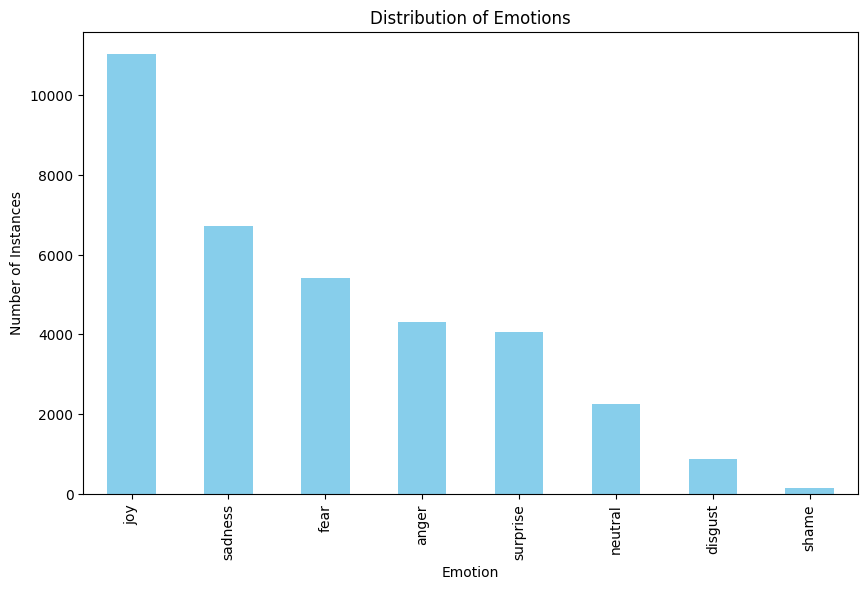

In [ ]:
emotion_counts = df['Emotion'].value_counts()
# Plotting the histogram
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Number of Instances')
plt.show()

6 Unique Emotions-
 ['neutral' 'joy' 'sadness' 'fear' 'surprise' 'anger']


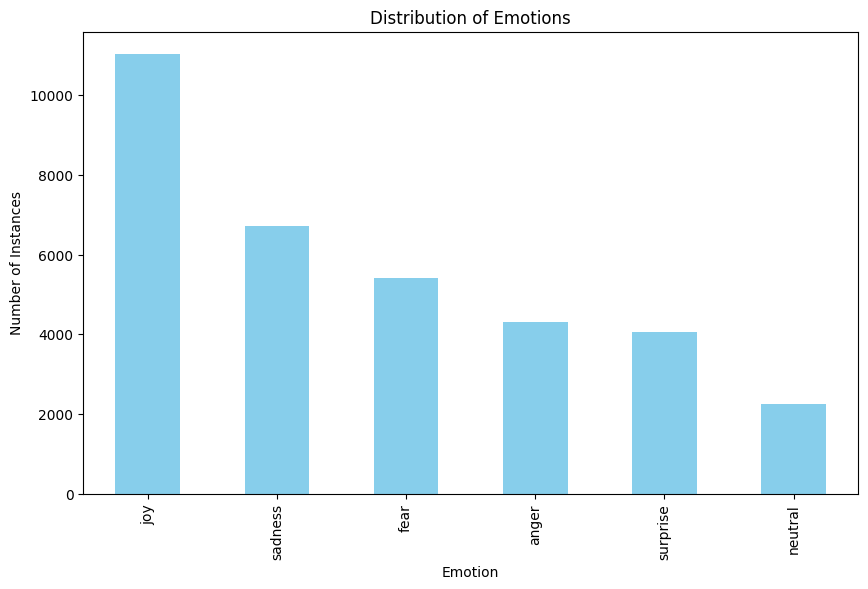

In [ ]:
# Removing disgust and shame from the data
df = df[~df['Emotion'].isin(['disgust', 'shame'])]

print(len(df.Emotion.unique()), "Unique Emotions-\n", df.Emotion.unique())

emotion_counts = df['Emotion'].value_counts()
# Plotting the histogram
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Number of Instances')
plt.show()

In [ ]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_passage(text):
    tokens = word_tokenize(text)
    lower_tokens = [token.lower() for token in tokens]
    pos_tags = pos_tag(lower_tokens)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return lemmatized_words

def remove_punct(text):
  text_nopunct = ''
  text_nopunct = re.sub('['+string.punctuation+']', '', text)
  return text_nopunct

def remove_stop_words(tokens):
    return [word for word in tokens if word not in stoplist]

df['Text'] = df['Text'].apply(lambda x: remove_punct(x))
tokens = df['Text'].apply(lambda x: lemmatize_passage(x))
filtered_words = [remove_stop_words(sen) for sen in tokens]
filtered_text = [' '.join(sen) for sen in filtered_words]

df['Text_Final'] = filtered_text
df['tokens'] = filtered_words
print(df.head())

   Emotion                                               Text  \
0  neutral                                              Why     
1      joy     Sage Act upgrade on my to do list for tommorow   
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...   
3      joy   Such an eye  The true hazel eyeand so brillia...   
4      joy  Iluvmiasantos ugh babe hugggzzz for u   babe n...   

                                          Text_Final  \
0                                                      
1                     sage act upgrade list tommorow   
2  way homegirl baby funeral man hate funeral rea...   
3  eye true hazel eyeand brilliant regular featur...   
4  iluvmiasantos ugh babe hugggzzz u babe naamaze...   

                                              tokens  
0                                                 []  
1               [sage, act, upgrade, list, tommorow]  
2  [way, homegirl, baby, funeral, man, hate, fune...  
3  [eye, true, hazel, eyeand, brilliant, regular,...

In [ ]:
#what lemmatize does?
print(lemmatize_passage('most best better easier played huggzzz'))

['most', 'best', 'well', 'easy', 'played', 'huggzzz']


In [ ]:
emotions =list(df.Emotion.unique())
print("Emotions-", emotions)
data = df[['Text_Final', 'tokens', 'Emotion']]
data['Label'] = data['Emotion'].apply(lambda e: emotions.index(e))
print(data[:5])

Emotions- ['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger']
                                          Text_Final  \
0                                                      
1                     sage act upgrade list tommorow   
2  way homegirl baby funeral man hate funeral rea...   
3  eye true hazel eyeand brilliant regular featur...   
4  iluvmiasantos ugh babe hugggzzz u babe naamaze...   

                                              tokens  Emotion  Label  
0                                                 []  neutral      0  
1               [sage, act, upgrade, list, tommorow]      joy      1  
2  [way, homegirl, baby, funeral, man, hate, fune...  sadness      2  
3  [eye, true, hazel, eyeand, brilliant, regular,...      joy      1  
4  [iluvmiasantos, ugh, babe, hugggzzz, u, babe, ...      joy      1  


In [ ]:
data_train, data_test = train_test_split(data, test_size=0.10, random_state=42)

In [ ]:
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

263101 words total, with a vocabulary size of 33587
Max sentence length is 101


In [ ]:
#too many words so only unique words are removed

from collections import Counter
count = Counter(all_training_words)

repeated_training_words = [word for word, freq in count.items() if freq >= 2]

NEW_TRAINING_VOCAB = sorted(list(set(repeated_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(NEW_TRAINING_VOCAB)))

263101 words total, with a vocabulary size of 12707


In [ ]:
all_test_words = [word for tokens in data_test["tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

29115 words total, with a vocabulary size of 8061
Max sentence length is 45


In [ ]:
from gensim.models import Word2Vec
# CBOW Model
# init_timestamp = pd.Timestamp.now()
# cbow_model = Word2Vec(tokens, vector_size=300, window=5, min_count=1, sg=0)
# final_timestamp = pd.Timestamp.now()
# print("Time taken by CBOW model", final_timestamp - init_timestamp)

init_timestamp = pd.Timestamp.now()
skipgram_model = Word2Vec(tokens, vector_size=300, window=5, min_count=1, sg=1)
final_timestamp = pd.Timestamp.now()
print("Time taken by Word2Vec Model", final_timestamp - init_timestamp)

Time taken by Word2Vec Model 0 days 00:00:31.349552


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer(max_features=300)

# def get_average_word2vec(tokens, vector, generate_missing=False, k=300):
#   if len(tokens)<1:
#     return np.zeros(k)
#   if generate_missing:
#     vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens]
#   else:
#     vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens]
#   length = len(vectorized)
#   summed = np.sum(vectorized, axis=0)
#   averaged = np.divide(summed, length)
#   return averaged

# def get_word2vec_embeddings(vectors, data, generate_missing=False, tf_idf=False):
#   if tf_idf:
#     tfidf_embeddings = tfidf_vectorizer.fit_transform(data['Text_Final'])
#     return tfidf_embeddings.toarray()
#   embeddings = data['tokens'].apply(lambda x: get_average_word2vec(x, vectors, generate_missing=generate_missing))
#   embeddings_array = np.array(embeddings.tolist())
#   return embeddings_array

In [ ]:
MAX_WORDS = 100
EMBEDDING_DIM = 300
TFIDF=False

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.layers import GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=len(NEW_TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 33499 unique tokens.


In [118]:
train_embeddings = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word, i in train_word_index.items():
  train_embeddings[i, :] = skipgram_model.wv[word] if word in skipgram_model.wv else np.random.rand(EMBEDDING_DIM)
print(train_embeddings.shape)

(33500, 300)


In [ ]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_WORDS)

In [ ]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_WORDS)

In [119]:
def ConvLayers(embeddings, max_words, vocab, embedding_dim, labels_index):
  embedding_layer = Embedding(vocab,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_words,
                            trainable=False)

  sequence_input = Input(shape=(max_words,), dtype='int32')
  embedded_sequences = embedding_layer(sequence_input)

  convs = []
  filter_sizes = [2,3,4,5,6]

  for filter_size in filter_sizes:
      l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
      l_pool = GlobalMaxPooling1D()(l_conv)
      convs.append(l_pool)


  l_merge = concatenate(convs, axis=1)

  x = Dropout(0.1)(l_merge)
  x = Dense(128, activation='relu')(x)
  x = Dropout(0.2)(x)
  preds = Dense(labels_index, activation='softmax')(x)

  model = Model(sequence_input, preds)
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['acc'])
  model.summary()
  return model

model = ConvLayers(train_embeddings, MAX_WORDS, len(train_word_index)+1, EMBEDDING_DIM,
                len(emotions))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_8 (Embedding)   │ (None, 100, 300)       │     10,050,000 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_25 (Conv1D)        │ (None, 99, 200)        │        120,200 │ embedding_8[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_26 (Conv1D)        │ (None, 98, 200)        │        180,200 │ embedding_8[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_27 (Conv1D)        │ (None, 97, 200)        │        240,200 │ embedding_8[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_28 (Conv1D)        │ (None, 96, 200)        │        300,200 │ embedding_8[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_29 (Conv1D)        │ (None, 95, 200)        │        360,200 │ embedding_8[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_25   │ (None, 200)            │              0 │ conv1d_25[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_26   │ (None, 200)            │              0 │ conv1d_26[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_27   │ (None, 200)            │              0 │ conv1d_27[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_28   │ (None, 200)            │              0 │ conv1d_28[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_29   │ (None, 200)            │              0 │ conv1d_29[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 1000)           │              0 │ global_max_pooling1d_… │
│ (Concatenate)             │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 1000)           │              0 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)     

 Total params: 11,379,902 (43.41 MB)

 Trainable params: 1,329,902 (5.07 MB)

 Non-trainable params: 10,050,000 (38.34 MB)

In [ ]:
x_train = train_cnn_data
y_train = np.zeros((x_train.shape[0], len(emotions)))
for i, index in enumerate(data_train['Label']):
  y_train[i][index] = 1
print(y_train[0], y_train.shape)

[0. 1. 0. 0. 0. 0.] (30411, 6)


In [ ]:
num_epochs = 3
batch_size = 100

In [ ]:
hist = model.fit(x_train, y_train, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/3
274/274 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - acc: 0.4319 - loss: 1.4349 - val_acc: 0.5115 - val_loss: 1.2684
Epoch 2/3
241/274 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - acc: 0.5241 - loss: 1.2293

In [ ]:
x_test = test_cnn_data
y_test = np.zeros((x_test.shape[0], len(emotions)))
for i, index in enumerate(data_test['Label']):
  y_test[i][index] = 1
print(y_test[0], y_test.shape)

[0. 0. 0. 0. 1. 0.] (3379, 6)


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

# Print the accuracy
print(f'Test Accuracy: {accuracy * 100:.2f}%')

106/106 ━━━━━━━━━━━━━━━━━━━━ 17s 157ms/step - acc: 0.5485 - loss: 1.1879
Test Accuracy: 54.54%
